## Prediction Using Decision Tree Algorithm

**Decision Trees:**
Decision Tree Algorithm randomly selects the complete dataset at a go and creates a tree out of it. That particular tree will be used to predict the values as outputs.<br><br>
I will be demonstrating the use of decision tree algorithm here in my code.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


So the data we see here is non-null. We need not spare our time to clean the data in terms of nullity here.
<br> Moreover, all of the data except Species are either integers or float values where species are of object type. We need to deal with that too. Now let's move on to the Exploratory Data Analysis part...

##Exploratory Data Analysis


Here, I will encode the categorical features to the numerical(or one-hot) since Decision Trees cannot perform well with the categorical datasets. I will be using One-Hot Encoder to encode the categorical features. <br>
*Note: We need not do Ordinal Encoding here as none of the flower types are in any ranges of good to bad or so forth.*

In [5]:
df=df.drop(columns='Id',axis=1)
x=df.drop(columns='Species',axis=1)
y=df['Species']

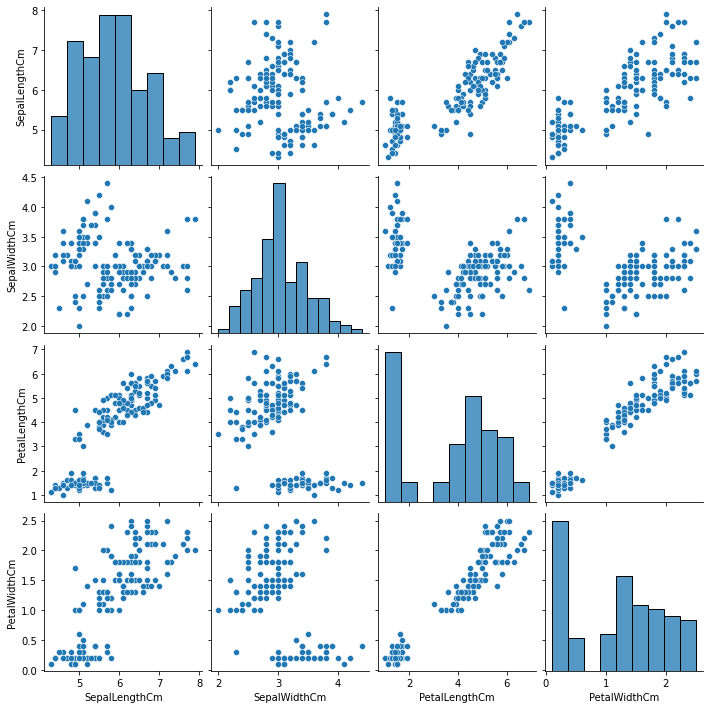

In [6]:
sns.pairplot(df);

## Model Building

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformers=[('oh',OneHotEncoder(),[5])]
transformed=ColumnTransformer(transformers=transformers,remainder='passthrough')


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(max_depth=5)
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)

## Evaluation

Here I will use a handful of metrics to evaluate my model's performance. Since this is a classification problem and there are evenly distributed label data, I don't have any problem on using accuracy score as my metric here.


In [10]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('The accuracy score is ',accuracy_score(y_test,y_pred))
print('The f1 score is ',f1_score(y_test,y_pred,average='weighted'))
print('Below is the confusion matrix for the model')
print(confusion_matrix(y_test,y_pred))
#There are only two of the data that are wrongly interpreted. Others are interpreted nicely.



The accuracy score is  0.9666666666666667
The f1 score is  0.9667936507936509
Below is the confusion matrix for the model
[[ 7  0  0]
 [ 0 10  0]
 [ 0  1 12]]


The accuracy I received is 96% which seems nice.

## Let's see this as a graph

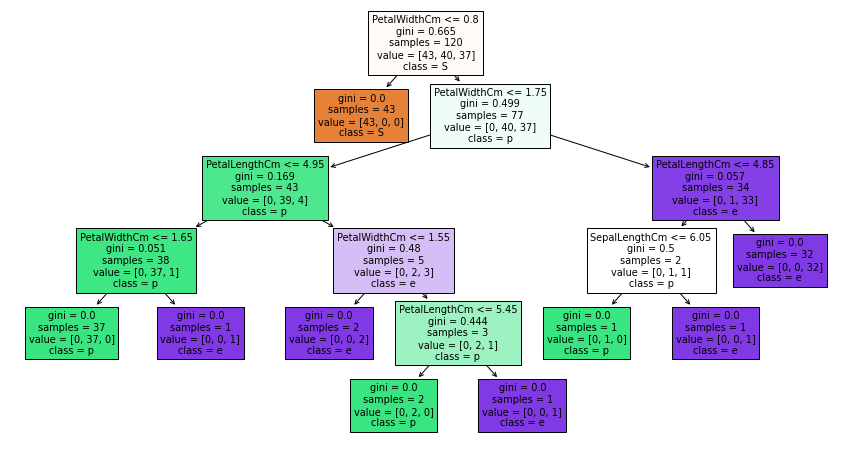

In [11]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(15,8))
tree.plot_tree(dct,feature_names=list(df),class_names='Species',filled=True);